# Case Study : Inference

We want to build different models to predict how much a professional soccer is worth when they move from team to team.  In case you were unaware, teams purchase players from each other for vast sums of money at the top levels of the game.  This money is completely different from the player's wages, which can also be huge numbers.  When club B purchases a player from club A, they have to agree with the selling club the value of the player, and seperately negotiate with the player what their new salary will be.  Both selling club and player have to agree before a transfer actually happens.

We'll investigate how to predict player value using data from the video game FIFA 2020 that we've previously used. The data is collected from a soccer video game where real pro players are encoded into the video game with stats that are supposed to accurately reflect the players in the real world.


# Part I : Setup & Data Wrangling

In this section you'll want to:
- import any packages you'll need for your analysis
    - a number are provided for you, but feel free to edit if there are other packages you want to use or changes to the input you want to make (Note: this is allowed in labs; in assignments you're limited to the imports we give you)
- read the dataset in
- understand what's going on in the data
    - how many observations?
    - what variables do you have? what variable types are here
    - which will you need to answer the question?

In [2]:
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# import pandas & numpy library
import pandas as pd
import numpy as np
import scipy.stats as stats

# Statmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

Before we start let's examine how to use the statsmodels interface and how to read the output.  We will first construct a null hypothesis dataset... completely independent x and y variables that have no relationships to discover.  Statsmodels should show us that these x and y cannot reject the null hypothesis that the true relationship between x and y has zero slope.

In [3]:
null_df = pd.DataFrame(
    {'x':stats.norm.rvs(size=1000),
     'y':stats.norm.rvs(size=1000)}
)

null_result = smf.ols(formula = 'y ~ x', data = null_df).fit()

null_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.832
Date:                Fri, 07 Nov 2025   Prob (F-statistic):              0.176
Time:                        21:09:42   Log-Likelihood:                -1422.5
No. Observations:                1000   AIC:                             2849.
Df Residuals:                     998   BIC:                             2859.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0155      0.032     -0.487      0.626      -0.078       0.047
x              0.0414      0.031      1.354      0.176      -0.019       0.101
==============================================================================
Omnibus:                        5.480   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                5.554
Skew:                           0.180   Prob(JB):                       0.0622
Kurtosis:                       2.938   Cond. No.                         1.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Read these summary results above and ask yourself how would I know if...
- the slope of x has a p-value that allows me to reject the null hypothesis? (it won't here)
- the total variance explained (R-squared) of the model made me think it had good powers of prediction (it won't here)
- OLS may produce invalid estimates because statistical assumptions were violated (like normally distributed residuals, heteroskedasticity, 

If you're unsure how to find any of these bits of information I'd suggest reading both the statsmodel documentation and also searching for something like "how do I read and interpret the statsmodels OLS summary?"

OK now that you've been exposed a bit let's get down with the real problem and real data (that hopefully allows you to reject the null)

**Load the dataset from this directory into a variable called `df_fifa20`** and take a look at the data.

In [4]:
# Get CSV directly from URL above
# YOUR CODE HERE
df_fifa20 = pd.read_csv("players.csv")

In [5]:
assert isinstance(df_fifa20, pd.DataFrame)
assert df_fifa20.shape == (18278, 15)

Okay, so we can see the data here. Each row (observation) contains data about a different FIFA player. It looks like we have information from 18278 different players. We ultimately want to look at the relationship between position (left or right), international reputation, potential, preferred foot and value in euros. Since we have many features (position (left or right), international reputation, potential, and preferred foot), we need to perform some wrangling to create a column for footedness. Now, it's time to wrangle...

In [6]:
df_fifa20.columns

Index(['sofifa_id', 'short_name', 'age', 'dob', 'height', 'weight',
       'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage',
       'player_positions', 'preferred_foot', 'international_reputation'],
      dtype='object')

Let's have a quick rundown on what each column represents:

* `potential` is how good the player could become with the correct coaching 
* `overall` represents the players' performace right now
* `value_eur` is the players' worth in euros (what club B pays club A to acquire the player)
* `preferred_foot` indicates the players' dominant side, `Left` or `Right`
* `international_reputation` is a numerical representation of how popular each player is internationally
* `player_positions` has all the positions each player plays on their respective team
* `club` is what team the player is from
* `age` is the age of the player
* `height` is the height of the player
* `weight` is the weight of the player
* `dob` is the player's date of birth
* `nationality` is what country the player represents / plays for
* `wage` is the player's wage
* `short_name` is the player's name

Let's also take a look at the types of each column. How many numerical columns (integer and float) do we have in our dataset? Save this answer as an integer to the variable `numerical_col_num`.

In [7]:
[print(df_fifa20[col].dtype) for col in df_fifa20.columns]

int64
object
float64
object
object
object
object
object
float64
float64
int64
float64
object
object
int64


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [8]:
# YOUR CODE HERE
numerical_col_num = 7

In [9]:
assert numerical_col_num
assert type(numerical_col_num) == int

# there are additional hidden tests here


In [10]:

# Let's take a look at how the dataframe looks 

df_fifa20.head() # perhaps you know some of these players, no worries if not

,sofifa_id,short_name,age,dob,height,weight,nationality,club,overall,potential,value_eur,wage,player_positions,preferred_foot,international_reputation
0,158023,L. Messi,32.0,NaN,170.0 cms,72.0 Kilograms,Argentina,FC Barcelona,94.0,94.0,95500000,565000.0,"RW, CF, ST",Left,5
1,20801,Cristiano Ronaldo,34.0,1985-02-05,187.0 cms,83.0 Kilograms,Portugal,Juventus,93.0,93.0,58500000,405000.0,"ST, LW",Right,5
2,190871,Neymar Jr,27.0,1992-02-05,175.0 cms,68.0 Kgs,Brazil,Paris Saint-Germain,92.0,92.0,105500000,290000.0,"LW, CAM",Right,5
3,200389,J. Oblak,26.0,1993-01-07,74.0 in,87.0 Kilograms,Slovenia,Atlético Madrid,91.0,93.0,77500000,125000.0,GK,Right,3
4,183277,E. Hazard,28.0,1991-01-07,175.0 cms,163.0 Pounds,Belgium,Real Madrid,91.0,91.0,90000000,470000.0,"LW, CF",Right,4


The remaining columns either contain numerical data that is in a text form (like heigh and weight, see previous discussion lab where we cleaned them and converted to numeric) or data that is categorical in nature (club, nationality, and player's field positions)


When building a linear model, we are usually trying to predict a numerical value (like `value_eur`) using other numerical values.  That's the form you're used to.  For example $ y = f(\mathbf{x}) = \beta_0 + \beta_1 x_1 + \beta_2 x_2  $. But note there can also be linear models that use a categorical inputs, such as $y = \beta_0 + \beta_1 x + \beta_2 (\textrm{nationality==England}) + \beta_3 (\textrm{nationality==Germany})$ that uses one numeric variable and one categorical variable to predict.  In this particular example the categorical nationality has only three possible values, England, Germany, and France with France being the default category.  When either of the Boolean arguments about nationality evaluate as True, then the associated beta is added to the existing intercept $\beta_0$ which ends up representing French players as the default.  Thus you can see the English and German betas as representing the mean difference between those nationalities values and the French players.  

We will return to this concept later when we actually build a model.

# Part II : EDA & Visualization

Once you understand your dataset, you'll want to:
- understand the relationships and trends for the variables in your dataset
- generate exploratory visualizations

Use the cell below to look at the summary statistics for the dataframe's numeric variables

In [11]:
# take a look at some descriptive statistics for the numeric variables in the dataframe
# YOUR CODE HERE
df_fifa20.describe()

,sofifa_id,age,overall,potential,value_eur,wage,international_reputation
count,18278.000000,18273.000000,18266.000000,18275.000000,1.827800e+04,18277.000000,18278.000000
mean,219738.864482,25.282439,66.245319,71.547688,2.484038e+06,9457.350769,1.103184
std,27960.200461,4.657051,6.951412,6.139656,5.585481e+06,21352.226983,0.378861
min,768.000000,16.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000
25%,204445.500000,22.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000
50%,226165.000000,25.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000
75%,240795.750000,29.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000
max,252905.000000,42.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000


For EDA, let's visualize the numerical columns in our dataframe. Let's take a look at the distribution of the thing we want to predict: `value_eur`. Plot the histogram of `value_eur` and save the graph to the variable `value_eur_plot`. Set `bins = 20` to have a clean visual.

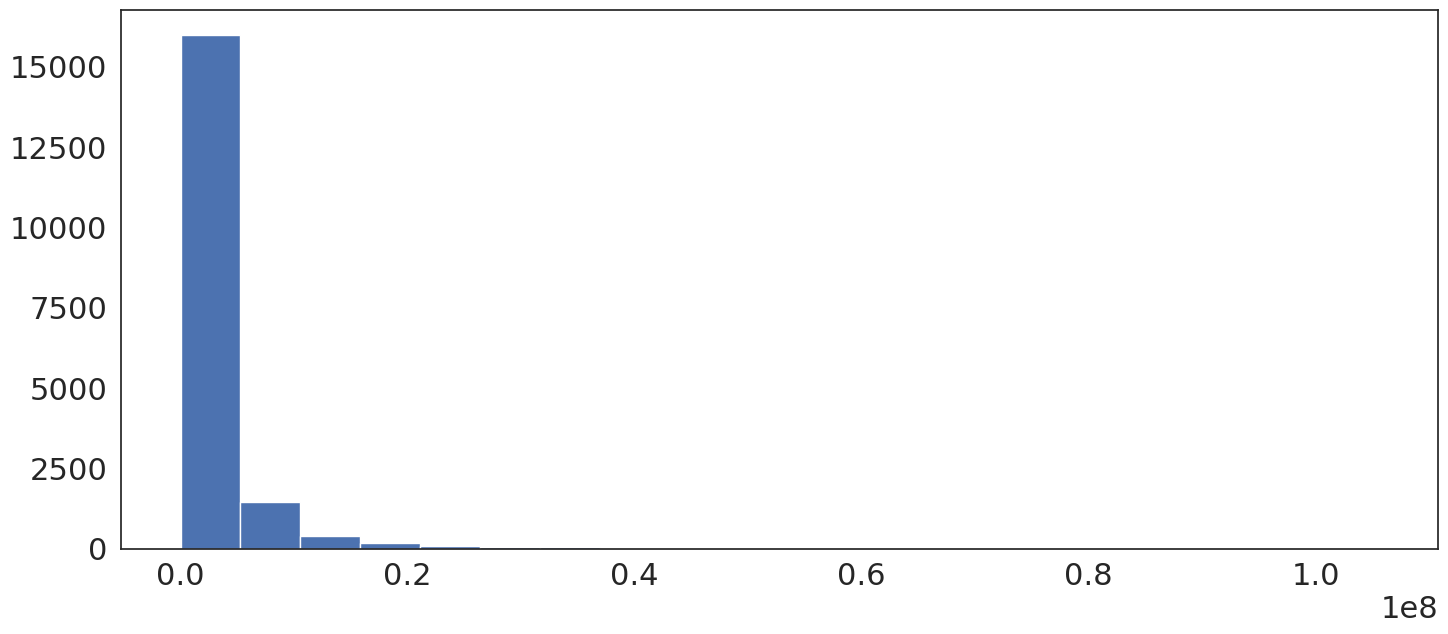

In [16]:
# YOUR CODE HERE
value_eur_plot = plt.hist(df_fifa20["value_eur"], bins = 20)

Looking at the distribution of `value_eur`, we see that the histogram is right skewed, meaning that a significant amount of players have a lower monetary value, and only a few players have values that are several orders of magnitude more expensive.   

This is quite common whenever we look at data related to economics.  Inequality is part of most economic systems.  There are players in this dataset who are worth 10,000x as much as other players. Just like there are companies worth 10,000x as much as other companies and people with yearly incomes that are 10,000x times yours.  People and companies and players on the lower end of the income distribution will be common, and those on the upper end of the distribution will be only a percent or two of the total.

However, to keep in mind for future analysis, this distribution (like many economic measures) is not normally distributed. To use this column in our analyses, we need to apply a log transformation for `value_eur`. A good tip to keep in mind is that if the distribution of the data looks heavily right skewed or exponential, performing a log transformation can make the distribution resemble normal. We will do that transformation in a little bit

<br>
<br>

Let's also take a look at the distribution of `international_reputation`. Visualize `international_reputation` as a bar graph to see the counts of each reputation score. Save the plot to the variable named `int_rep_plot`. 

There are two ways to do this: (1) seaborn has a specific function that visualizes counts.  Or (2) you can build it yourself using pandas native tools: start with the dataframe's method `.value_counts()` and then make a bar graph from that.

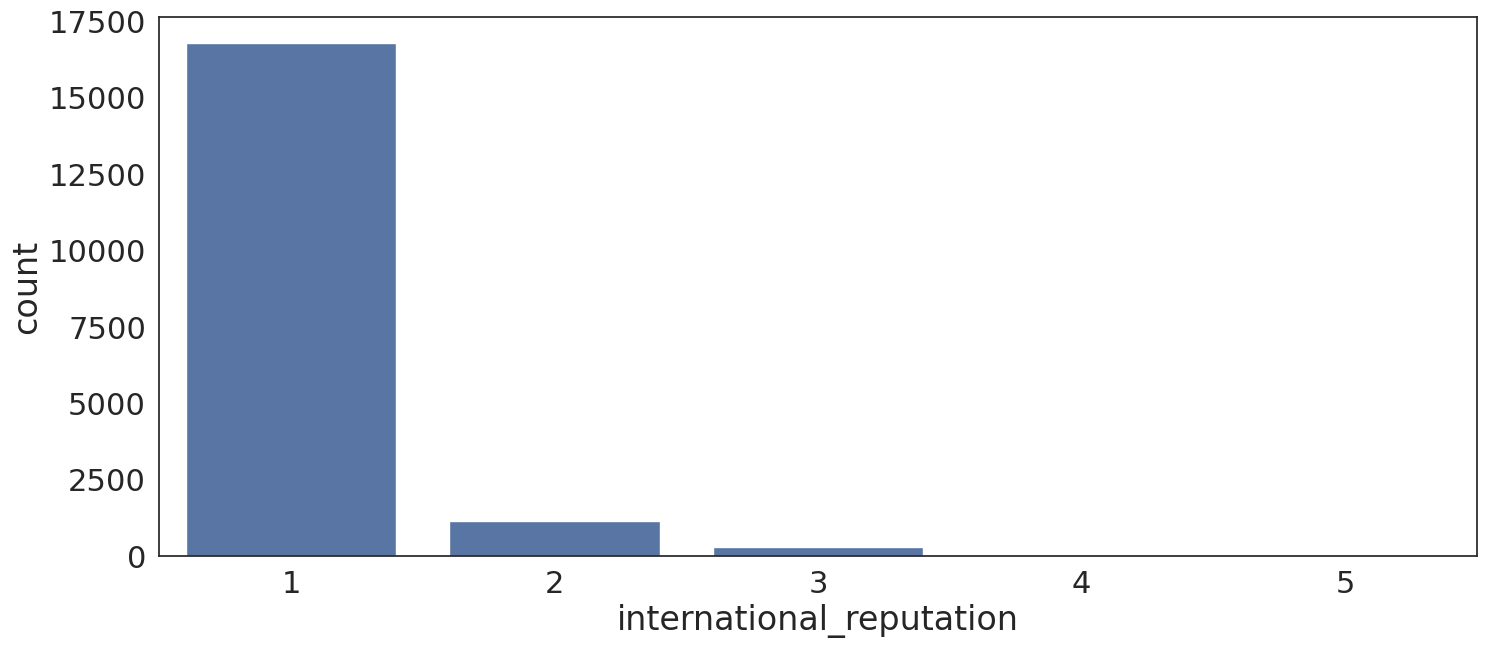

In [27]:
# YOUR CODE HERE
int_rep_plot = sns.countplot(x="international_reputation", data=df_fifa20)

In [28]:
# TESTING CELL, DO NOT EDIT
assert isinstance(int_rep_plot, matplotlib.axes._axes.Axes), "The plot should return a matplotlib Axes object"
assert (int_rep_plot.get_ylabel().lower() == 'international_reputation') | (int_rep_plot.get_xlabel().lower() == 'international_reputation'), "X or Y-axis should represent 'international_reputation'"



From what we see in the graph, it looks like most of the players have `international_reputation = 1` with fewer and fewer players in the categories 2 through 5.

Can you figure out whether 1 or 5 means the player has the better international reputation?  Hint:  if you look for the most famous player you can think of (or search for "most famous soccer player" using the search engine of your choice) you can assume they are going to have the best possible reputation when they play for their country in the World Cup.

Intuitively, we assume that a player with a better `international_reputation` will have more  `value_eur`.  Or maybe its vice versa... but either way we expect the beta involved to be non-zero :)


Aside from individual columns, we should also examine the relationships between columns. In our columns, we know that both `potential` and `overall` are features that represent the players' performance. `potential` looks at their projected score for their performance and `overall` is their current score for their performance. 

<br>

Let's examine the relationship between these two metrics. Using a plotting matrix, examine the relationship between `overall` and `potential`. Save this plot in the variable `potential_vs_overall_plot`.

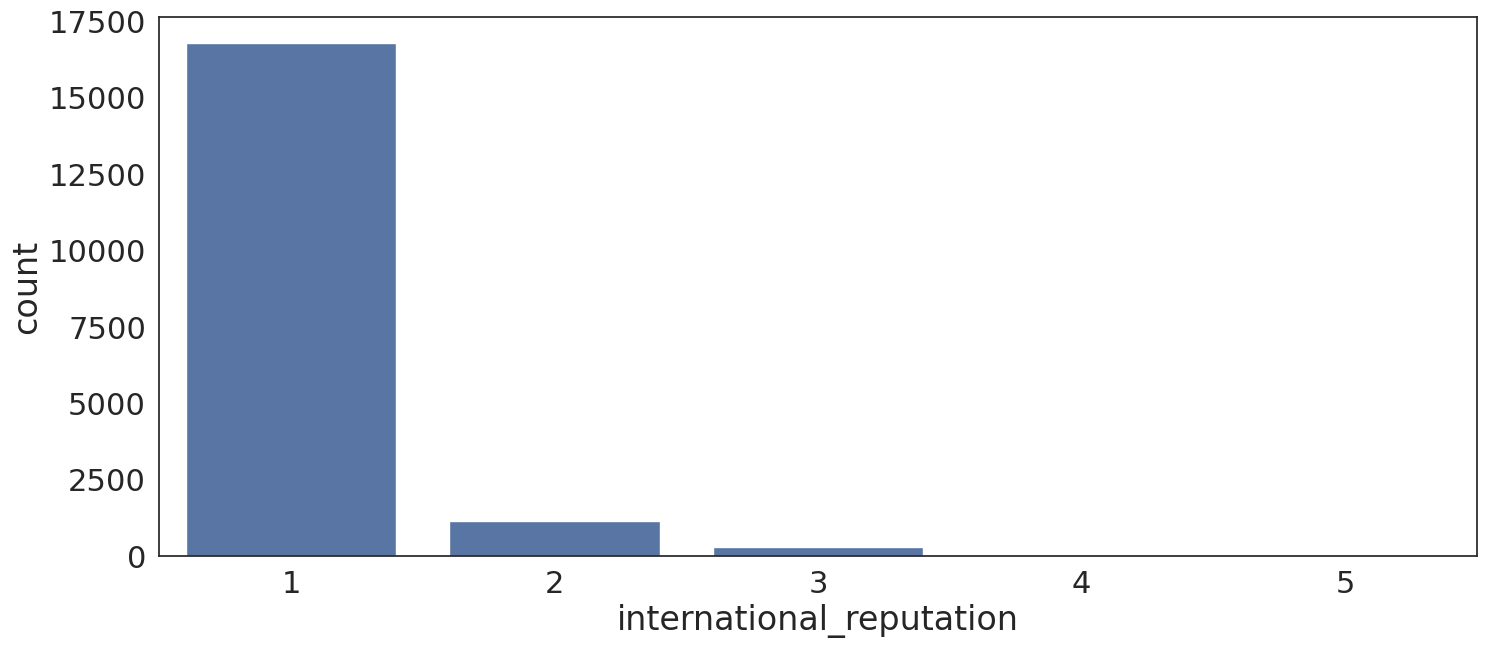

In [29]:
# YOUR CODE HERE
potential_vs_overall_plot = sns.countplot(x="international_reputation", data=df_fifa20)

In [30]:
assert type(potential_vs_overall_plot)==sns.axisgrid.PairGrid
assert potential_vs_overall_plot.axes.shape[0]==2

NameError: name 'potential_vs_overall_plot' is not defined

In [ ]:
# TESTING CELL, PLEASE DO NOT EDIT

Taking a look at our pairplot visualization, we can see that `overall` and `potential` have a roughly linear relationship.

In the graphs, the trend we see is that `potential` is always greater than or equal to `overall`, meaning that at least some players are expected to improve in the future.  

Maybe you know something about the game, and it might be clear to you that some players (often younger ones) may have amazing physical abilities and ball skills, but they haven't yet learned to make great strategic decisions. These are players where `overall` is currently much less than their `potential`. With time and the right kind of coaching, they could hopefully reach that potential.

It may also help to know that teams buying and selling players may value them based on `potential` hoping to coach them to that level,  rather than their current skills That comes with time, and in the right cAnd knowing something about the game, you might guess that younger players who with great physical skills 

<br>
<br>

We can also apply sns.pairplot with all of our numerical columns of interest: `potential`, `age`, `international_reputation`, and `value_eur`. Create the pairwise plot to examine the relationships between the numerical columns stated above (only those columns!  don't do all of them). Save this plot to the variable `num_cols_pair_plot`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert type(num_cols_pair_plot)==sns.axisgrid.PairGrid
assert num_cols_pair_plot.axes.shape[0] == 4, "pariplot should have 4 variables" 


In [ ]:
# TESTING CELL, PLEASE DO NOT EDIT

What are some trends you see in the pairwise plots? 

We see some interesting relationships between `international_reputation`, `potential`, and `age` with `value_eur`. Take note of the relationships (linear, exponential, quadratic, etc) that you see between each of the variables.  We will have to make the appropriate transformations if we wish to model these using OLS which can produce bogus answers if the residuals are non-normally distributed.  And non-normal variable distributions can lead to non-normal residuals.

One important observation is that `value_eur` seems to have an exponential relationship with `potential`... which could be related to the exponential distribution of `value_eur` itself.

Remember that OLS regression needs to have the residual errors be close to normally distributed for the regression to be valid. That's NOT the same thing as requiring the dependent variable to be normally distributed.  But weird distributions of variables could lead to weird distributions of residuals... so we will want to test out predicting with both raw and log transformed versions of `value_eur`.

Let's visualize `value_eur` with a log transform to see if the distribution becomes normal under this transformation. Using `sns.histplot`, visualize the distribution for `value_eur` aand set `log_scale = True`. Save the graph in a variable named `value_eur_hist_log`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

With the log transform, we can see that the distribution of value_eur looks more normal. Using the log transformed values of value_eur satisfies the conditions for linear regression, along with most of the variables having a linear relationship with each other. 

Now that we know that a log transform makes `value_eur` look more normal, let's create a log transformed version of `value_eur` in a new column named `log_value_eur` inside the dataframe.  That way we can later explore if it helps make our model better instead of using the raw data.

In [ ]:
# ask yourself, why is there a +1 inside the log transform?
df_fifa20['log_value_eur'] = np.log10(df_fifa20['value_eur'] + 1)


Lets take a look at the plot of `age` vs `value_eur` in the pairplot thats a page above us by now.  You will note that this scatterplot has a great deal of peakiness around 26 years of age, and falls off as players get younger or older.

Here's a bit of soccer knowledge that may explain it:  Young players are still developing their foot skills and ability to make good decisions under pressure.  Players past 30 or so are starting to slow down and are unable to use their athletic abilities in the same way they could before.  So 25ish is the beginning of a player's peak ability, and it lasts until 30 or so.  When a player is closer to 25 the buying club gets more years of "peak" then they do when a player is closer to 30. Thus the peak of their valuation is close to 25/26.

Let's define a quadratic transformation of age in an inverted u-shape... with a peak at 26 years of age.  That math will look something like $-a*(\mathrm{age}-26)^2 + b$ where $a,b$ are constants that scale the equation to the desired min/max.  

For completely arbitrary reasons lets scale this inverted u-shaped curve from 0 to 1. You need to figure out the constants $a,b$ and assign them to variables `quad_a` and `quad_b` in the solution cell below.  

Hint: you can figure out the player age in the dataset that maximizes the value $(\mathrm{age}-26)^2$ and then $a$ is the reciprocal of that value to cancel it out and make our quadratic 0. In that case $b$ becomes the desired maximum value at age 26. 

When we have done this quadratic rescaling of the the age column we will store it in a new column called `quad_age`.  Now we will be able to explore if `quad_age` or `age` leads to a better predicting model.

In [ ]:
print('raw age\n', df_fifa20['age'].describe())

# YOUR CODE HERE
raise NotImplementedError()

df_fifa20['quad_age'] = -quad_a*(df_fifa20['age']-26)**2 + quad_b

print('\nquadratic transformation of age\n', df_fifa20['quad_age'].describe())

In [ ]:
assert quad_a
assert quad_b
assert quad_a > 0.001
assert quad_a < 0.005 
assert quad_b > 0.95
assert quad_b < 1.05
# yes I'm kinda giving away the answer above, because I need you to get this right-ish
# otherwise later questions will go wrong.  But never fear, there are more hidden tests here
# that you cannot see which will lose some points if you don't get answer exactly correct


Finally we will investigate a categorical variable as well.  Let's pick nationality as potentially influencing player value.   Some studies suggest that players with the same talents may be valued differently depending on if their surname is Smith, Schmidt, or Herrera and which nation their passport comes from.  But there are too many nationalities in the database (162) to work with, so lets limit it to the four most common ones ["England", "Germany", "Spain", "France"]

In [ ]:
df_top4nats = df_fifa20.query('nationality in ["England", "Germany", "Spain", "France"]')

# Part III : Inferential Analysis

In this section, we’ll ask what model format will give us the best explanatory power for `value_eur`.  By model format we mean what happens when we try
- predicting log value_eur vs raw value_eur as the dependent variable?
- using overall vs potential as an indpendent variable to help predictions?
- using age vs quadratic transformation of age as as an indpendent variable to help predictions?
- adding in international reputation vs excluding it as an indpendent variable to help predictions?
- including vs excluding a categorical variable of nationality

So this implies we could ask for a bunch of different models.  Each one of these bullet points is 2 possibilities, there's 5 bullets, that means 2^5 (32) models with all possible pairings of model choice. But wait there's more!  For age/quad_age and overall/potential we could reasonably want to test the absence of a predictor as well as both possible versions of the predictor.  So that makes 72 models.  TOO MANY MY BRAIN HURTS PLEASE STOP!!! Clearly fitting that many models will be a multiple comparison nightmare, with high likelihood of overfitting and falsly rejecting the null hypothesis when it is really true.

How can we do in-sample model selection sensibly, using fewer model fits? We can use a variation on the forward model selection method.  

1. Using domain knowledge identify a set of independent variables (x variables) that could reasonably have an effect on the dependent variable (y variable).  For us that's overall, potential, age, quad_age, international_reputation, nationality.   In addition we want to consider both log_value_eur and value_eur as our y variables. 
2. For each potential x/y variable pair fit the simple model form: 'y ~ x'. Record the R-squared and p-values of the fit.   The best R-squared models are of the most interest to us. 
3. Take the best single x/y pair and add the 2nd best x for that y.  Does the model get better?  Keep the new variable if the Adjusted R-squared got better and the p-value of the new variable was significant at the p<0.05 level
4. Keep doing this.  Add the 3rd best single x, then the 4th, etc until you see no improvement in the model Adjusted R-squared

Here's some code to get you started on the single x/y fits


In [ ]:
# lets explore all single y ~ x possibilities

val_overall = smf.ols('value_eur ~ overall',
                   data = df_top4nats
                  ).fit()

log_overall = smf.ols('log_value_eur ~ overall',
                   data = df_top4nats
                  ).fit()

val_potential = smf.ols('value_eur ~ potential',
                   data = df_top4nats
                  ).fit()

log_potential = smf.ols('log_value_eur ~ potential',
                   data = df_top4nats
                  ).fit()

val_age = smf.ols('value_eur ~ age',
                   data = df_top4nats
                  ).fit()

log_age= smf.ols('log_value_eur ~ age',
                   data = df_top4nats
                  ).fit()

val_quad = smf.ols('value_eur ~ quad_age',
                   data = df_top4nats
                  ).fit()

log_quad= smf.ols('log_value_eur ~ quad_age',
                   data = df_top4nats
                  ).fit()

val_intl = smf.ols('value_eur ~ international_reputation',
                   data = df_top4nats
                  ).fit()

log_intl= smf.ols('log_value_eur ~ international_reputation',
                   data = df_top4nats
                  ).fit()

val_nat = smf.ols('value_eur ~ C(nationality)',
                   data = df_top4nats
                  ).fit()

log_nat= smf.ols('log_value_eur ~ C(nationality)',
                   data = df_top4nats
                  ).fit()

singlevar_models = [val_overall, log_overall, 
                    val_potential, log_potential, 
                    val_age, log_age, 
                    val_quad, log_quad,
                    val_intl, log_intl,
                    val_nat, log_nat
                   ]

for model in singlevar_models:
    print(model.summary())


### Q IIIa - Is log_value_eur or value_eur the better thing to predict?

Look at the R-squared values of the fits in the print statements above. One of these dependent variables (log_value_eur vs value_eur) is definitely giving us better R-squared no matter which independent variable we examine.

Set the variable `best_y` to be the name of the best R-squared choice.  

What does that tell you about the efficacy of the log transform?



In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert best_y in ['log_value_eur', 'value_eur']

# there are additional hidden tests here

### Q IIIb - Using that y variable you picked above, whats the best x variable?

Look at the R-squared values of the fits in the print statements above. Given that you already selected your preferred y variable, what is the choice of x that gives you the best R-squared and a p<0.05? 

Set the variable `best_single_x` to be the name of the best R-squared choice.  


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert best_single_x in ['overall', 'potential', 
                         'age', 'quad_age', 
                         'international_reputation', 
                         'nationality']

# there are additional hidden tests here

Ok now we are going to add more variables to the model. **BUT** we have some paired measurements:
- 'overall' and 'potential'
- 'age' and 'quad_age'
If we've added one of the pair to the model we probably shouldn't add the other. If we did there's the possibility of a multicolinearity problem.  And you can really see that for overall vs potential pairplot a few pages back.

So if you selected one of these variables in the previous `best_single_x` we can't add the other one of the pair now or anytime in the future.


OK lets do another round of selection.  But first before we do note down to yourself the Adjusted R-squared for the best_single_x prediction from above.  We are only going to accept a new model that has a higher adjusted R-squared!


And lucky you, I've coded up the model selection for you so you don't have to worry about it :)

In [ ]:
xvariables = ['overall', 'potential', 'age', 'quad_age', 'international_reputation', 'nationality']

# remove previous selection from consideration in the next step
if best_single_x in ['overall', 'potential']:
    xvariables.remove('overall')
    xvariables.remove('potential')
elif best_single_x in ['age', 'quad_age']:
    xvariables.remove('age')
    xvariables.remove('quad_age')
else:
    xvariables.remove(best_single_x)

twovar_models = []
for xvar in xvariables:
    new_formula = f'{best_y} ~ {best_single_x} + {xvar}'
    print('fitting:',new_formula)
    twovar_models.append( 
        smf.ols(new_formula, data = df_top4nats).fit()
    )
    
for model in twovar_models:
    print(model.summary())
    

### Q IIIc - Whats the best x to add as a 2nd variable?

Look at the R-squared values of the fits in the print statements above.  What is the choice of x that gives you the best R-squared and a p<0.05? 

Set the variable `best_second_x` to be the name of the best R-squared choice.  If there was no choice that improved R-squared and came with p<0.05 then set the variable equal to the Python reserved word `None`


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert best_second_x in ['overall', 'potential', 
                         'age', 'quad_age', 
                         'international_reputation', 
                         'nationality', None]

# there are additional hidden tests here

Ok now we are going to add more one more variable to the model. 

OK lets do another round of selection.  But first before we do note down to yourself the Adjusted R-squared for the best_single_x prediction from above.  We are only going to accept a new model that has a higher adjusted R-squared!


And lucky you, I've coded up the model selection for you so you don't have to worry about it :)

In [ ]:
# once again remove previous selection from consideration in the next step
# and make sure that paired variable choices are both removed
if best_second_x in ['overall', 'potential']:
    xvariables.remove('overall')
    xvariables.remove('potential')
elif best_second_x in ['age', 'quad_age']:
    xvariables.remove('age')
    xvariables.remove('quad_age')
else:
    xvariables.remove(best_second_x)

threevar_models = []
for xvar in xvariables:
    new_formula = f'{best_y} ~ {best_single_x} + {best_second_x} + {xvar}'
    print('fitting:',new_formula)
    threevar_models.append( 
        smf.ols(new_formula, data = df_top4nats).fit()
    )
    
for model in threevar_models:
    print(model.summary())

### Q IIId - Whats the best x to add as a 3rd variable?

Look at the R-squared values of the fits in the print statements above.  What is the choice of x that gives you the best R-squared and a p<0.05? 

Set the variable `best_third_x` to be the name of the best R-squared choice.  If there was no choice that improved R-squared and came with p<0.05 then set the variable equal to the Python reserved word `None`


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert best_third_x in ['overall', 'potential', 
                         'age', 'quad_age', 
                         'international_reputation', 
                         'nationality', None]

# there are additional hidden tests here

### Q IIId - Do we think that the model fits are reliable?

Use the cell below to make your final model form and print out the summary table one last time. Assign the output of the fitted model to `final_model`

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
print(final_model.summary()) # if this fails you probably forgot to .fit()

# hidden tests here to make sure you got the final model right


There are some causes for concern in these results (even if you did it perfectly).  

1. R-squared this high is very fishy.  I suspect we have overfit.  If we used this model to predict values in other years of the FIFA game I suspect it won't look as good as it does here.
2. Note that the Prob(Omnibus) and Prob(JB) are two tests for the normality of residuals.  And they are telling us these residuals are wonky shaped.
3. Kurtosis is huge, it should be around 3, and this indicates very heavy tails with some extreme outliers.
4. Skew is huge (should be magnitude less than 1) and negative.  Which tells us that the left tail is heavier than the right.  So there's lots of lower value players that are being poorly predicted by this model.

Did we do all this for nothing?  Hell no.  While we don't love this, OLS is probably still giving you some information about the real relationships here.

Ideally you would probably repeat this analysis using another method (like robust regresssion) that cares less about non-normal residuals.  

Bare minimum when you write your project report you'd mention that the regressions may not be super believable given the problems highlighted here.  A caveat added to your discussion of results.  Not a killer, just a downer.

## End of Discussion Lab Exercise #5

When you think you're done, verify that everything is working correctly by doing the following:
1. Save this notebook
2. Choose the pull down menu item Kernel -> Restart and Run All Cells
3. Check that you see the print statement in the cell below. If you see that happy sunglasses face emoji, it means that you have passed all the publicly visible tests. Yay!! 

In [ ]:
print("\N{SMILING FACE WITH SUNGLASSES}")